# Scheduler learning rates

Taken from https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863

In [6]:
import torch

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

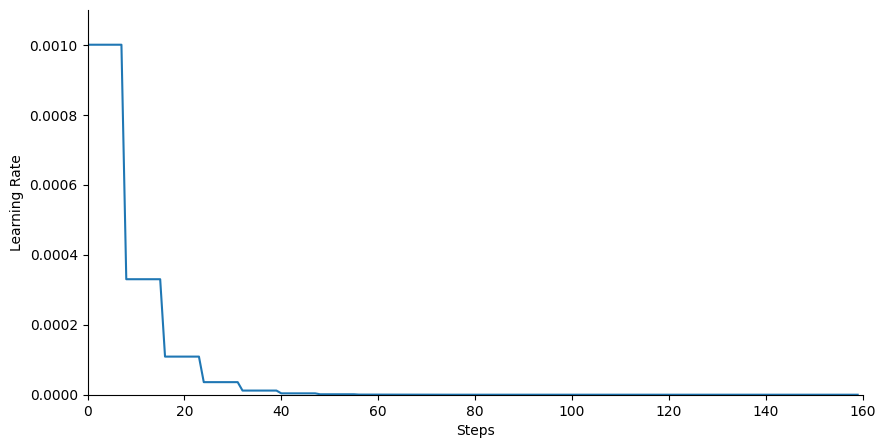

In [31]:
LEARNING_RATE = 1e-3
MAX_EPOCHS = 20
CURRENT_EPOCH = 8

# Set model and optimizer
model = torch.nn.Linear(2, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# Define your scheduler here as described above
step_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=8, gamma=0.33)
multi_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[STEPS_IN_EPOCH*num for num in range(0, EPOCHS) if num % (EPOCHS/5) == 0][1:], gamma=0.333)
poly_scheduler = torch.optim.lr_scheduler.PolynomialLR(optimizer, total_iters = STEPS_IN_EPOCH * MAX_EPOCHS, power = 2)
cosine_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max = STEPS_IN_EPOCH * MAX_EPOCHS, eta_min = 1e-8)


# Get learning rates as each training step
learning_rates = []

for i in range(EPOCHS*STEPS_IN_EPOCH):
    optimizer.step()
    learning_rates.append(optimizer.param_groups[0]["lr"])
    step_scheduler.step()

# Visualize learinig rate scheduler
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(range(EPOCHS*STEPS_IN_EPOCH), 
        learning_rates,)
        # marker='o', 
        # color='black')
ax.set_xlim([0, EPOCHS*STEPS_IN_EPOCH])
ax.set_ylim([0, LEARNING_RATE + 0.0001])
ax.set_xlabel('Steps')
ax.set_ylabel('Learning Rate')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.xaxis.set_major_locator(MultipleLocator(STEPS_IN_EPOCH))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.show()